Capítulo 18: Argumentos
=====================
#### Libro Learning Python 5th Ed. by Mark Lutz

## 1. Argumentos y referencias compartidas

### Paso de objetos inmutables:

- Métafora pulpo variables

![00 metafora pulpo variables.png](<attachment:00 metafora pulpo variables.png>)

- Variables, objetos y referencias

![01 Variables, objetos y referencias.png](<attachment:01 Variables, objetos y referencias.png>)

- Objeto con dos referencias

![02 objeto con dos referencias.png](<attachment:02 objeto con dos referencias.png>)
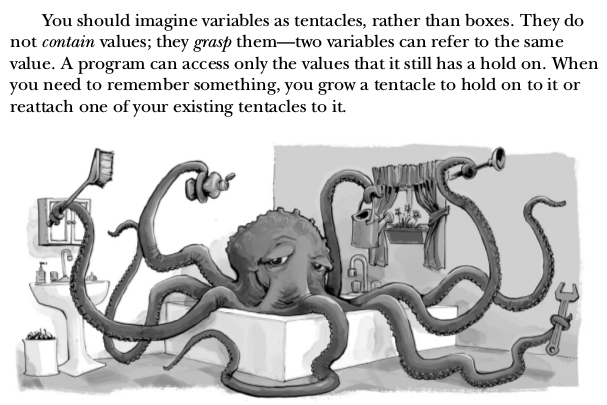
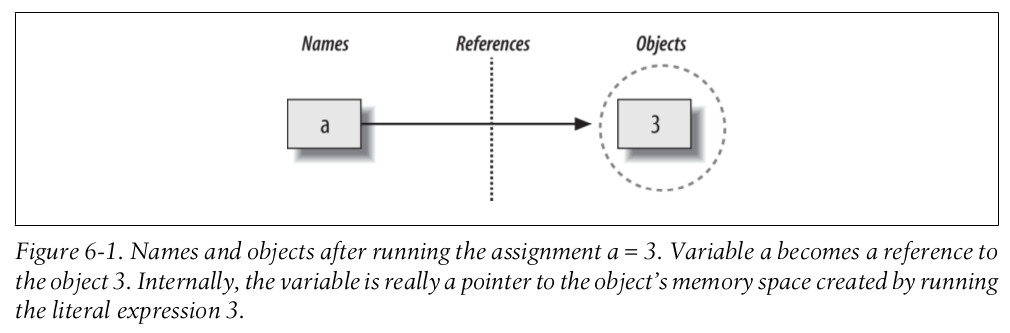
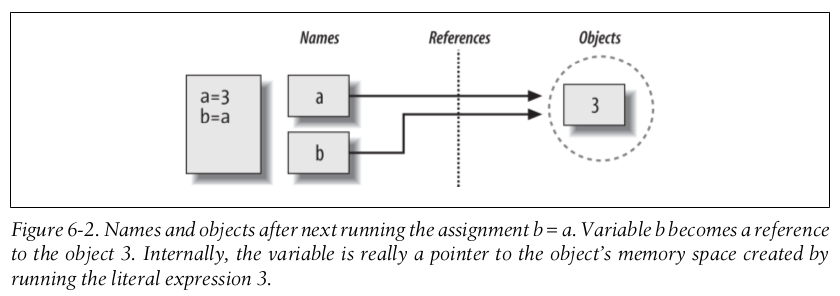

In [ ]:
def f(a):	    	# a se asigna a (referencias) el objeto pasado
	a = 99 			# Solo modifica la variable local a

b = 88		
f(b)				#a y b hacen referencia al mismo 88 inicialmente
print("b = ", b)	#b no cambia

b =  88


En la función, la variable B nunca cambia su valor, solo cambia la variable A que primero vale 88 y luego se le asigna otro valor que es 99.

### Paso de objetos mutables:


In [ ]:

def changer(a, b):	    # Los argumentos asignaban referencias a objetos
		a = 2			# Solo cambia el valor del nombre local
		b[0] = 'spam' 	# Modifica el objeto compartido en su lugar
					
x = 1
l = [1, 2]
changer(x, l)           # Llamador: Pasar objetos inmutables y mutables
print("l = ", l)        # ['spam', 2]  
						#x permanece sin cambios, l es diferente
assert x == 1, "x es 1"

l =  ['spam', 2]


La funcion cambia x por a y l por b, pero b indica que solo se cambia la primera posición (PASO POR COPIA a,b - PASO POR REFERENCIA x,l)

### Cómo evitar que una rutina modifique los elementos mutables:

#### - Pasar una copia

In [ ]:

l = [1, 2]
changer(x, l[:]) 	# Pasa una copia para que nuestra 'l' no cambie 

print("l = ", l) 


l =  [1, 2]


Pasar una copia para que no se modifiquen los elementos mutables (l[:]) >> mastermind útil

#### - Utilizar invariantes (en las estructuras de datos de entrada)

In [ ]:
l = [1, 2]
def changer(a, b):
    b = b[:]		# Copiamos la lista de entrada para no afectar a quien llama
    a = 2
    b[0] = 'spam'	# Solo se modifica nuestra lista

changer(x, l)
assert l == [1, 2], "l es una invariante"
print("l = ", l) 


l =  [1, 2]


Falta de reutilización: si tienes código referencialmente transparente, si tienes funciones puras —todos los datos entran en sus argumentos de entrada y todo sale sin dejar ningún estado atrás— es increíblemente reutilizable.

El acoplamiento es malo, para llevarte una función tienes que llevarte otras funciones.

#### - Convertir el objeto mutable a un objeto inmutable:


In [ ]:

l = [1, 2]
def changer(a, b):	   
		a = 2			
		b[0] = 'spam'   # TypeError: El objeto 'tuple' no admite la asignación de elementos

changer(x, tuple(l))	# Pasa una tupla, de modo que los cambios sean errores

print("l = ", l)
assert l == [1, 2], "l es una invariante"


TypeError: 'tuple' object does not support item assignment

Una tupla no permite mutar. El assert no falla

## 2 Modos especiales de coincidencia de argumentos

#### ver figura 06 en Drive

Tenga cuidado de no confundir la sintaxis especial `nombre=valor` en el encabezado de una función y en una llamada a función;

en la llamada se refiere a un argumento de palabra clave que coincide por nombre, mientras que en el encabezado especifica un valor predeterminado para un argumento opcional.

### Ejemplos de palabras clave y valores predeterminados

#### 1. Comportamiento por defecto:

In [7]:
def f(a, b, c): 
    print(a, b, c)

f(1, 2, 3)          # 1 2 3

1 2 3


Se asignan 3 valores por copia

#### 2. Palabras clave

El orden de izquierda a derecha de los argumentos ya no importa cuando se utilizan palabras clave porque **los argumentos coinciden por nombre, no por posición**.


In [8]:
def f(a, b, c): 
    print(a, b, c)

f(c=3, b=2, a=1)    # 1 2 3

1 2 3


En este caso, se unen por nombre del argumento no por la posición. Esto no es necesario, es liar a la persona que lo lee

In [ ]:
f(1, c=3, b=2)		# a obtiene 1 por posición, b y c pasan por nombre.
                    # 1 2 3

# Hacen que tus llamadas sean un poco más autodocumentadas
# f(name='Bob', age=40, job='dev')

1 2 3


El primer valor a esta en orden, pero intercambia b y c 

#### 3. Valores predeterminados

Los valores predeterminados nos permiten hacer que los argumentos de la función seleccionados sean **opcionales**;

si no se pasa un valor, al argumento se le asigna su valor predeterminado antes de que se ejecute la función.


In [ ]:

def definir - f(a, b=2, c=3): 	# a obligatorio, b y c opcionales
	print(a, b, c)

invocar
f(1)      					  	# 1 2 3
f(a=1)      					# 1 2 3

1 2 3
1 2 3


Definir/Invocar. Al no recibir el valor se le da el el f(1) por defecto y luego ya invocas un numero f(a=1)

Si pasamos dos valores, solo `c` obtiene su valor predeterminado, y con tres valores, no se utiliza ningún valor predeterminado:

In [ ]:
def f(a, b=2, c=3): 	# a obligario, b y c opcionales
	print(a, b, c)
    
f(1, 4)    			 	# 1 4 3
f(1, 4, 5)				# Anular valores predeterminados: 1 4 5

f(1, c=6)				# Elegir valores predeterminados: 1 2 6

1 4 3
1 4 5
1 2 6


b y c vienen con valores por defecto, a no y en el ultimo cambia el valor de c

#### 4. Combinación de palabras clave y valores predeterminados

Recuerde que, al usar argumentos de palabra clave en la llamada, el orden en que se enumeran no importa; **Python busca coincidencias por nombre, no por posición**.

Quien llama a la función debe proporcionar valores para `spam` y `eggs`, pero estos pueden buscarse por posición o por nombre.

In [ ]:

def func(spam, eggs, toast=0, ham=0):
	print((spam, eggs, toast, ham)) 	# Se requieren los primeros 2

func(1, 2)								# Salida: (1, 2, 0, 0)
func(1, ham=1, eggs=0)					# Salida: (1, 0, 0, 1)
func(spam=1, eggs=0)					# Salida: (1, 0, 0, 0)
func(toast=1, eggs=2, spam=3)			# Salida: (3, 2, 1, 0)
func(1, 2, 3, 4) 						# Salida: (1, 2, 3, 4)


(1, 2, 0, 0)
(1, 0, 0, 1)
(1, 0, 0, 0)
(3, 2, 1, 0)
(1, 2, 3, 4)


monty python spam (spam, eggs, toast)

### 5. Argumentos de solo palabra clave en Python 3.X

También podemos usar el carácter `*` solo en la lista de argumentos para indicar que una función
no acepta una lista de argumentos de longitud variable, pero aun así espera que todos los argumentos que siguen al `*` se pasen como palabras clave.

In [ ]:
def kwonly(a, *b, c):
    print(a, b, c)

kwonly(1, 2, c=3)       # 1 (2,) 3

kwonly(a=1, c=3)        # 1 () 3

kwonly(1, 2, 3)         # TypeError: Falta kwonly() 1 argumento obligatorio de solo palabra clave: 'c'

1 (2,) 3
1 () 3


TypeError: kwonly() missing 1 required keyword-only argument: 'c'

Si la pones delante absorbe (empaquetar) todos los valores de después //() es una tupla

Aún puedes usar valores predeterminados para argumentos de solo palabra clave, aunque aparezcan después del `*` en el encabezado de la función:

In [ ]:

def kwonly(a, *, b='spam', c='ham'):
	print(a, b, c)

kwonly(1)               # 1 spam ham
kwonly(1, c=3)          # 1 spam 3
kwonly(a=1)             # 1 spam ham
kwonly(c=3, b=2, a=1)   # 1 2 3
kwonly(1, 2)            # TypeError: La función kwonly() requiere un argumento posicional, pero se proporcionaron dos

1 spam ham
1 spam 3
1 spam ham
1 2 3


TypeError: kwonly() takes 1 positional argument but 2 were given

A es obligatorio/requerido, b y c tienen valores por defecto. Esto da error porque despues del asterisco solo se aceptan nombres 

In [ ]:

def kwonly(a, *, b, c='spam'):
    print(a, b, c)

kwonly(1, c='eggs')     # TypeError: Falta kwonly() 1 argumento obligatorio de solo palabra clave: 'b'

TypeError: kwonly() missing 1 required keyword-only argument: 'b'

No se le da el valor a B por defecto 

## Ejemplos de argumentos arbitrarios
Las dos últimas extensiones coincidentes, `*` y `**`, están diseñadas para admitir funciones que aceptan **cualquier número de argumentos**.

Ambas pueden aparecer tanto en la **definición** de la función como en una **llamada** a la misma.

### Encabezados: Recopilación de argumentos
En la _definición_ de la función, se recopilan los argumentos posicionales no coincidentes en una **tupla** y se asigna la variable **args** a dicha tupla.

In [11]:
def f(*args):
    print(args)

f()                 # ()
f(1,)               # (1,)
f(1, 2, 3, 4)       # (1, 2, 3, 4)  

()
(1,)
(1, 2, 3, 4)


Args es una tupla vacia, los valores que le vas añadiendo se van sumando

La función `**` solo funciona para argumentos de palabra clave. Los agrupa en un nuevo **diccionario**.

In [3]:
def f(**args):
    print(args)
f()                 # {}
f(a=1, b=2)         # {'a': 1, 'b': 2}

{}
{'a': 1, 'b': 2}


a y b las pasan al diccionario

In [4]:
def f(a, *pargs, **kargs):
    print(a, pargs, kargs)
f(1, 2, 3, x=1, y=2)        # 1 (2, 3) {'y': 2, 'x': 1}

1 (2, 3) {'x': 1, 'y': 2}


a vale 1 porque es la primera posicion, despues tupla y luego diccionario

### Llamadas: Desempaquetado de argumentos

La sintaxis `*` en una llamada a una función desempaqueta una colección de argumentos.

In [12]:
def func(a, b, c, d): print(a, b, c, d)

args = (1, 2)
args += (3, 4)
func(*args)         # Same as func(1, 2, 3, 4)

1 2 3 4


Defines la función, coge la variable args y lo suma, los empaqueta

In [ ]:
args = {'a': 1, 'b': 2, 'c': 3}
args['d'] = 4
func(**args)    # La misma que func(a=1, b=2, c=3, d=4)

1 2 3 4


Le suma diccionario
args['d'] = 4 >> busca en el diccionario
numeros/letras

In [ ]:
func(*(1, 2), **{'d': 4, 'c': 3})       # La misma que func(1, 2, d=4, c=3)
# 1 2 3 4
func(1, *(2, 3), **{'d': 4})            # La misma que func(1, 2, 3, d=4)
# 1 2 3 4
func(1, c=3, *(2,), **{'d': 4})         # La misma que func(1, 2, c=3, d=4)
# 1 2 3 4
func(1, *(2, 3), d=4)                   # La misma que func(1, 2, 3, d=4)
# 1 2 3 4
func(1, *(2,), c=3, **{'d':4})          # La misma que func(1, 2, c=3, d=4)
# 1 2 3 4


1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4


Desempaquetar el diccionario 